# Cálculo del valor de decisión óptimo para el caso de una regla de decisión MAP en una observación discreta

In [1]:
#---------------------------------------------------------------------------------
# Project    : Tarea N°8
# Authors    : Mugni Juan Mauricio
# Affiliation: UNC
# E-mail     : mauricio.mugni@mi.unc.edu.ar
#---------------------------------------------------------------------------------

## Consigna

Suponga que se transmite un símbolo binario $A \in \{ 0,1 \}$ con probabilidades a priori $P_A(0)=q$ y $P_A(1)=1-q$ a través de un canal BSC. La observación $Y \in \{ 0,1 \}$ también es binaria e igual a A con probabilidad $1-p$.
- Encuentre cualitativamente la regla de decisión MAP para el caso de $q = 0.9$ y $p = 0.2$
- Encuetre cualitativamente la regla de decisión MAP para el caso de $q = 0.5$ y $p = 0.3$
- A diferencia del caso ML, si suma todas las barras del histograma obtenido no va a obtener como resultado 1. ¿Puede intuir a que se debe?
- En cual de los casos (puto 1 o punto 2) esta regla de decisión es óptima? dicho en otras palabras, cuando esta regla de decisión produce la misma probabilidad de error?
- Realice y adjunte la simulación Monte Carlo del problema.

## Resolución

Para la resolución de este ejercicio se tuvo en cuenta la siguiente imagen:
| ![](imageTarea5.png) | 
|:--:| 
|Fig. 1: A schematic diagram of the binary symmetric channel (BSC), wich flips bits with probability $p$.|

La cual fue empleada en ejercicios anteriores para la resolución de un problema similar.


A partir del esquema podemos determinar:

$P_{Y|H}(0|0) = 1-p $ Probabilidad de que la salida sea 0 para cuando la entrada es 0 si la fuente fuera equiprobable

$P_{Y|H}(1|0) = p $   Probabilidad de que la salida sea 1 para cuando la hipotesís es 0 si la fuente fuera equiprobable

$P_{Y|H}(0|1) = p $   Probabilidad de que la salida sea 0 para cuando la hipotesís es 1 si la fuente fuera equiprobable

$P_{Y|H}(1|1) = 1-p $ Probabilidad de que la salida sea 1 para cuando la hipotesís es 1 si la fuente fuera equiprobable

Como la probabilidad de la fuente no es equiprobable, debemos multiplicar por la probabilidad de la fuente:

$P_A(0)P_{Y|H}(0|0) = q.(1-p) $

$P_A(0)P_{Y|H}(1|0) = q.p $

$P_A(1)P_{Y|H}(0|1) = (1-q).p $   

$P_A(1)P_{Y|H}(1|1) = (1-q).(1-p) $

### Simulación Monte Carlo para el caso $q=0.9$ y $p=0.2$

Podemos graficar la distribución de probabilidad para cada hipotesís. Para esto primero importamos las siguientes librerías, que servirán para el siguiente código:

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

A continuación desarrollamos el código para llevar a cabo la simulación de lo antes analizado.

In [49]:
def calcular_probabilidad(num_simulaciones,p,q):
    
    contador00 = 0       # Probabilidad de que la salida sea 0 para cuando la hipotesís es 0
    contador10 = 0       # Probabilidad de que la salida sea 1 para cuando la hipotesís es 0

    contador01 = 0       # Probabilidad de que la salida sea 0 para cuando la hipotesís es 1
    contador11 = 0       # Probabilidad de que la salida sea 1 para cuando la hipotesís es 1
    
    probabilidadA = 1 - p # Probabilidad del evento A: P(0|0) = P(1|1) = 1 - p
    probabilidadB = p     # Probabilidad del evento B: P(0|1) = P(1|0) = p

    P_A0 = q              # Probabilidad de que sea 0
    P_A1 = 1 - q          # Probabilidad de que sea 1 
    
    for i in range(num_simulaciones):
        
        N = random.random()      # Genera un número aleatorio entre 0 y 1

        #H = 0                   #Hipotesís
        if N < P_A1*probabilidadB:
            contador01 += 1
        elif N < P_A1*probabilidadA:
            contador11 += 1
        #H = 1                   #Hipotesís
        elif N < P_A0*probabilidadB:
            contador10 += 1
        else:           
            contador00 += 1

    prob00 = contador00 / num_simulaciones    #Probabilidad de P(0|0)
    prob10 = contador10 / num_simulaciones    #Probabilidad de P(1|0)
    prob01 = contador01 / num_simulaciones    #Probabilidad de P(0|1)
    prob11 = contador11 / num_simulaciones    #Probabilidad de P(1|1)

    # Datos de la tirada
    etiquetas = ['$Y=0$', '$Y=1$']
    datos_H0 = [prob00, prob10]
    datos_H1 = [prob01, prob11]

    colores = ['blue', 'blue', 'red', 'red']  # Asignando colores según hipótesis

    # Crear el histograma con etiquetas y colores
    plt.bar(etiquetas, datos_H0, color='blue', alpha=0.5, label='H=0')
    plt.bar(etiquetas, datos_H1, color='red', alpha=0.5, label='H=1')

    return (prob00,prob10,prob01,prob11)

Grafico el resultado para el caso de $q = 0.9$ y $p = 0.2$

Probabilidad de que la salida sea 0 para cuando la hipotesís es 0: 0.8199697 
Probabilidad de que la salida sea 1 para cuando la hipotesís es 0: 0.0999262 
Probabilidad de que la salida sea 0 para cuando la hipotesís es 1: 0.020116 
Probabilidad de que la salida sea 1 para cuando la hipotesís es 1: 0.0599881 
Suma de probabilidades: 1.0 



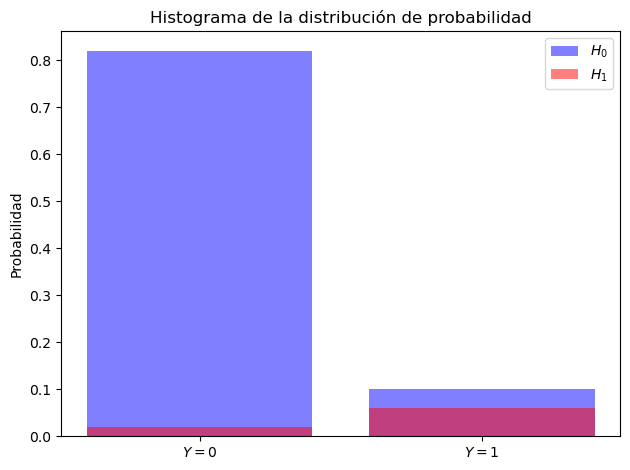

In [50]:
num_simulaciones = 10**7 #int(input("Ingrese el número de simulaciones: "))
p = 0.2
q = 0.9

results = calcular_probabilidad(num_simulaciones,p,q)

print(f'Probabilidad de que la salida sea 0 para cuando la hipotesís es 0: {results[0]} \n'
f'Probabilidad de que la salida sea 1 para cuando la hipotesís es 0: {results[1]} \n'
f'Probabilidad de que la salida sea 0 para cuando la hipotesís es 1: {results[2]} \n'
f'Probabilidad de que la salida sea 1 para cuando la hipotesís es 1: {results[3]} \n'
f'Suma de probabilidades: {results[0] + results[1] + results[2] + results[3]} \n')

plt.title('Histograma de la distribución de probabilidad')
plt.ylabel('Probabilidad')
plt.legend(['$H_0$', '$H_1$'])
plt.tight_layout()
plt.show()

En este caso podemos tomar de manera cualitativa el siguiente criterio de decisión, si es igual o mayor a 1, se esta enviando un 1. En cambio, si es menor se esta enviando un cero.
Y podemos ver que si tenemos cero, la probabilidad de que se este enviando un uno es baja.
En cambio, si tenemos uno, la probabilidad de que sea cero es alta. En uno es más probable que se este enviando 0 que uno.

### Simulación Monte Carlo para el caso $q=0.5$ y $p=0.3$

Realizamos los cambios pertinentes en la función definida anteriormente para realizar el gráfico para el caso de $q = 0.5$ y $p = 0.3$

In [4]:
def calcular_probabilidad(num_simulaciones,p,q):
    
    contador00 = 0       # Probabilidad de que la salida sea 0 para cuando la hipotesís es 0
    contador10 = 0       # Probabilidad de que la salida sea 1 para cuando la hipotesís es 0

    contador01 = 0       # Probabilidad de que la salida sea 0 para cuando la hipotesís es 1
    contador11 = 0       # Probabilidad de que la salida sea 1 para cuando la hipotesís es 1
    
    probabilidadA = 1 - p # Probabilidad del evento A: P(0|0) = P(1|1) = 1 - p
    probabilidadB = p     # Probabilidad del evento B: P(0|1) = P(1|0) = p

    P_A0 = q              # Probabilidad de que sea 0
    P_A1 = 1 - q          # Probabilidad de que sea 1 
    """
    for i in range(num_simulaciones):
        
        N = random.random()      # Genera un número aleatorio entre 0 y 1

        if N < P_A0*probabilidadB:
            contador10 += 1
        elif N < P_A0*probabilidadA:
            contador00 += 1   
        
        M = random.random()
        
        if M < P_A1*probabilidadB:
            contador01 += 1
        elif M < P_A1*probabilidadA:          
            contador11 += 1
     """       
    
    for i in range(num_simulaciones):
        
        N = random.random()      # Genera un número aleatorio entre 0 y 1

        if N < P_A0:
            M = random.random()
            if M < probabilidadB:
                contador10 += 1
            else:
                contador00 += 1 

        else:    
            R = random.random()
            if R < probabilidadB:
                contador01 += 1
            else:
                contador11 += 1
            
    prob00 = contador00 / num_simulaciones    #Probabilidad de P(0|0)
    prob10 = contador10 / num_simulaciones    #Probabilidad de P(1|0)
    prob01 = contador01 / num_simulaciones    #Probabilidad de P(0|1)
    prob11 = contador11 / num_simulaciones    #Probabilidad de P(1|1)

    # Datos de la tirada
    etiquetas = ['$Y=0$', '$Y=1$']
    datos_H0 = [prob00, prob10]
    datos_H1 = [prob01, prob11]

    colores = ['blue', 'blue', 'red', 'red']  # Asignando colores según hipótesis

    # Crear el histograma con etiquetas y colores
    plt.bar(etiquetas, datos_H0, color='blue', alpha=0.5, label='H=0')
    plt.bar(etiquetas, datos_H1, color='red', alpha=0.5, label='H=1')

    return (prob00,prob10,prob01,prob11)

Grafico el resultado para el caso de $q = 0.5$ y $p = 0.3$

Probabilidad de que la salida sea 0 para cuando la hipotesís es 0: 0.350056 
Probabilidad de que la salida sea 1 para cuando la hipotesís es 0: 0.1500878 
Probabilidad de que la salida sea 0 para cuando la hipotesís es 1: 0.1500555 
Probabilidad de que la salida sea 1 para cuando la hipotesís es 1: 0.3498007 
Suma de probabilidades: 1.0 



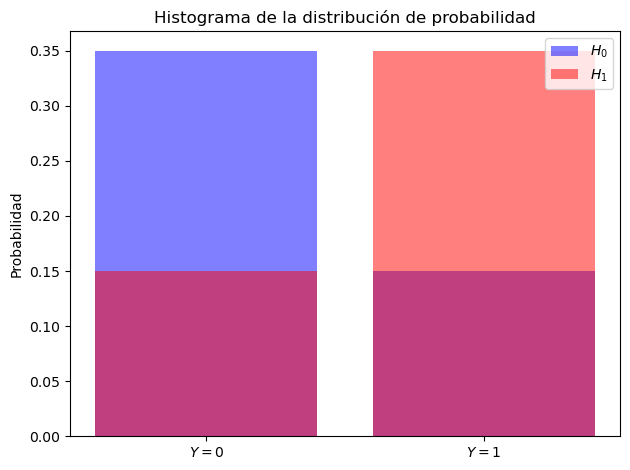

In [5]:
num_simulaciones = 10**7 #int(input("Ingrese el número de simulaciones: "))
p = 0.3
q = 0.5

results = calcular_probabilidad(num_simulaciones,p,q)

print(f'Probabilidad de que la salida sea 0 para cuando la hipotesís es 0: {results[0]} \n'
f'Probabilidad de que la salida sea 1 para cuando la hipotesís es 0: {results[1]} \n'
f'Probabilidad de que la salida sea 0 para cuando la hipotesís es 1: {results[2]} \n'
f'Probabilidad de que la salida sea 1 para cuando la hipotesís es 1: {results[3]} \n'
f'Suma de probabilidades: {results[0] + results[1] + results[2] + results[3]} \n')

plt.title('Histograma de la distribución de probabilidad')
plt.ylabel('Probabilidad')
plt.legend(['$H_0$', '$H_1$'])
plt.tight_layout()
plt.show()

- Cuando esta tenemos mínima probabilidad de error?
- El profesor dice que no  debe dar uno, pero a mí me da uno en ambos casos, y creo que se debe a que la probabilidad de la fuente para que sea $0$ y $1$ suman uno, y la probabilidad del canal tambien suman uno.     